In [1]:
# Srikanth Schelbert Homework2

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import math

/home/sags/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# All homework 1 functions
centerpoint = (6, 12)


def f(x,s):      
    # s = source (center of barbell)     
    # x = point      
    dcol = abs(x[0] - s[0])     
    drow = abs(x[1] - s[1])      
    # print(f"d col = {dcol}, d row = {drow}")      
    if (drow == 0) & (dcol == 0):         
        return 1     
    elif (drow == 1) & (dcol <= 1):         
        return 0.5     
    elif (drow == 2) & (dcol <= 2):         
        return (1/3)     
    elif (drow == 3) & (dcol <= 3):         
        return 0.25     
    else:         
        return 0 

# Generate grid points
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
X, Y = np.meshgrid(x, y)


# @functools.lru_cache(maxsize=None)
def compute_z(X, Y, centerpoint):
    """Compute function values Z"""
    Z = np.zeros_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f([X[i, j], Y[i, j]], centerpoint)
    return Z


def prob_z_given_x(x_i, s_i, z_i):
    """Computes p(z|x)"""
    if z_i == 1:
        return f(x_i, s_i)
    else:
        return 1 - f(x_i, s_i)


# @functools.lru_cache(maxsize=None)
def compute_L(X, Y, samples, results_vec):
    """Compute function values Z"""
    L = np.ones_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(len(results_vec)):
                L[i, j] *= prob_z_given_x(samples[k], [X[i, j], Y[i, j]], results_vec[k])
    return L


def generate_results(sample):
    """Generates 100 results from the same sample"""
    results = []
    for _ in range(100):
        x, y = sample[0], sample[1]
        if np.random.rand() < f([x, y], centerpoint):
            results.append(1)
        else:
            results.append(0)
    return results


def generate_one_result(sample):
    """Generates one results from a sample"""
    x, y = sample[0], sample[1]
    if np.random.rand() < f([x, y], centerpoint):
        return 1
    else:
        return 0


def compute_prob_sum(X, Y, sample, result, belief):
    """Compute probability sum"""
    p_sum = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            p_sum += prob_z_given_x(sample, [X[i, j], Y[i, j]], result) * belief[i, j]
    return p_sum

# Belief update eqn
def prob_s_given_z(x_i, s_i, z_i, b_bar_i, p_sum):
    """Computes p(s|z)"""
    return (prob_z_given_x(x_i, s_i, z_i) * b_bar_i)/p_sum


def update_belief(x_i, z_i, b_bar, p_sum):
    """Update total belief matrix"""
    Belief = np.ones_like(b_bar)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Belief[i, j] = prob_s_given_z(x_i, [X[i, j], Y[i, j]], z_i, b_bar[i, j], p_sum)
    return Belief

def random_walk(location):
    x_rand = np.random.rand()
    y_rand = np.random.rand()

    if 0 <= x_rand < 0.33 and location[0] > 0:
        location[0] = location[0] - 1
    elif 1 >= x_rand > 0.67 and location[0] < 24:
        location[0] = location[0] + 1
    
    if 0 <= y_rand < 0.33 and location[1] > 0:
        location[1] = location[1] - 1
    elif 1 >= y_rand > 0.67 and location[1] < 24:
        location[1] = location[1] + 1

    return location



(25, 25)


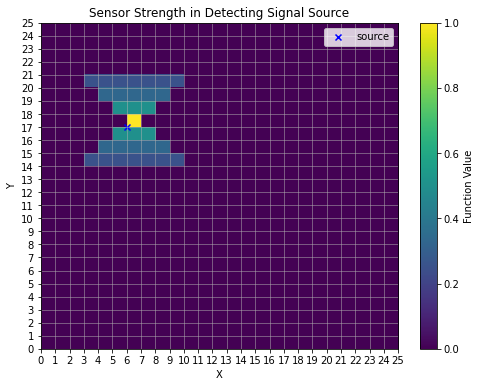

In [3]:
# Generate grid points
x = np.linspace(0, 24, 25)
y = np.linspace(0, 24, 25)
X, Y = np.meshgrid(x, y)

# Create the plot
centerpoint = (6, 17)
plt.figure(figsize=(8, 6))
# Plot sampled locations
plt.scatter(centerpoint[0], centerpoint[1], marker='x',
            color='blue', label='source')

Z_mat = compute_z(X, Y, centerpoint)
print(Z_mat.shape)

# Add legend
plt.legend(loc='upper right')
plt.imshow(Z_mat, extent=[0, 25, 0, 25], cmap='viridis',
           origin='lower', aspect='auto')
plt.colorbar(label='Function Value')
plt.title('Sensor Strength in Detecting Signal Source')
plt.grid(which='both', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(0, 26, 1))  # Set ticks every 1 unit
plt.yticks(np.arange(0, 26, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

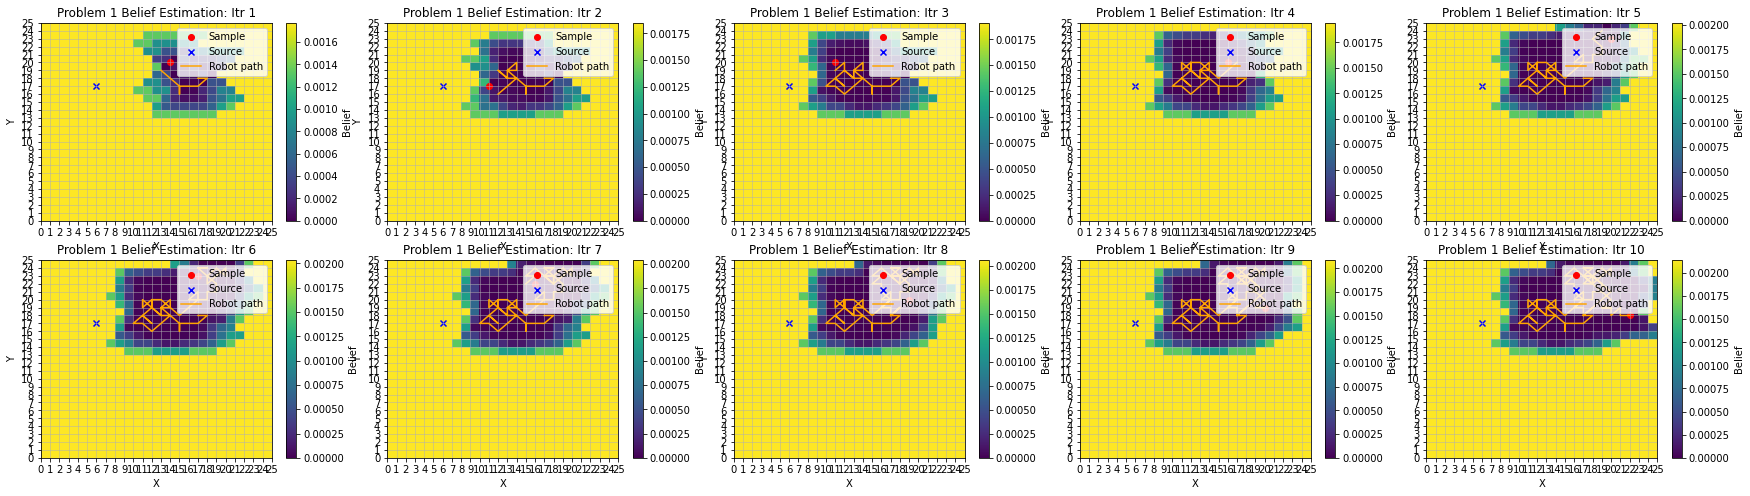

In [5]:
initial_prior = 1/(X.shape[1] * X.shape[0])
B = np.ones_like(X) * initial_prior  # Initialize array for prior belief

# Define your plotting function
def plot_iteration(sample, belief, result, x_values, y_values, subplot_index):
    plt.subplot(2, 5, subplot_index)

    # Define custom colormap from black to green
    colors = [(0, 0, 0), (0, 0.5, 0)]  # black to dark green
    cmap_name = 'black_to_green'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Add white sensor gradient
    # plt.legend(loc='upper right')
    # plt.imshow(Z_mat, extent=[0, 25, 0, 25], cmap='gray',
    #         origin='lower', aspect='auto', alpha=0.7)
    # plt.colorbar(label='True Bernoulli Dist')

    if result == 1:
        plt.scatter(sample[0], sample[1], color='green', label='Sample')
    else:
        plt.scatter(sample[0], sample[1], color='red', label='Sample')
    plt.scatter(centerpoint[0], centerpoint[1], marker='x',
                color='blue', label='Source')

    plt.plot(x_values, y_values, color='orange', label='Robot path')
    # Add legend
    plt.grid(which='both', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(0, 26, 1))  # Set ticks every 1 unit
    plt.yticks(np.arange(0, 26, 1))
    plt.legend(loc='upper right')
    plt.imshow(belief, extent=[0, 25, 0, 25], cmap='viridis',
               origin='lower', aspect='auto', alpha=1.0)
    plt.colorbar(label='Belief')
    plt.title(f'Problem 1 Belief Estimation: Itr {subplot_index}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.figure(figsize=(30, 8))  # Adjust figure size as needed

curr_sample = [17, 18]
x_vals = []
y_vals = []
# Iteratively generate and plot results for different samples
for i in range(10):  # Change the range according to the desired number of iterations
    for j in range(10):
        x_vals.append(curr_sample[0])
        y_vals.append(curr_sample[1])
        curr_sample = random_walk(curr_sample)
        curr_result = generate_one_result(curr_sample)
        prob_sum = compute_prob_sum(X, Y, curr_sample, curr_result, B)
        B = update_belief(curr_sample, curr_result, B, prob_sum)
    plot_iteration(curr_sample, B, curr_result, x_vals, y_vals, subplot_index=i+1)
plt.show()

In [6]:
# Problem 2 Infotaxis

def choose_direction(current_loc, belief):
    """Calculates the best motion to take based on entropy"""
    lx = current_loc[0]
    ly = current_loc[1]
    moves = [(lx, ly), (lx, ly+1), (lx, ly-1), (lx+1, ly), (lx-1, ly)]
    entropy = [100,100,100,100,100,100,100,100,100,100]

    # Calculate p(z|x)
    second_terms = [0,0,0,0,0,0,0,0,0,0]
    # Iterate twice once for each result getting g(x, z)
    for m in range(2):
        result = m #1 if m == 0 else 0
        # Iterate over each possible move
        for n in range(5):
            if 0 <= moves[n][0] < 25 and 0 <= moves[n][1] < 25:
                Bd = np.copy(belief)
                pr_sum = compute_prob_sum(X, Y, moves[n], result, Bd)
                second_terms[(m*5) + n] = pr_sum
                Bd = update_belief(moves[n], result, Bd, pr_sum)

                H = 0
                # Create an iterator for iterating over the belief array
                with np.nditer(Bd) as it:
                    # Iterate over each element in the array
                    for x in it:
                        if x > 1e-9:
                            H += ((-x) * np.log(x))
                        else:
                            pass
                entropy[(m*5) + n] = H
                # entropy[(m*5) + n] = np.sum(np.multiply(-Bd,np.log(Bd,where=(Bd!=0))))
            else:
                # Check that this will work
                second_terms[(m*5) + n] = 1e9
                entropy[(m*5) + n] = 1e9

    # print(f"ent: {entropy}")
    # print(f"st {second_terms}")
    J = [0,0,0,0,0]
    for r in range(5):
        # print(entropy[r])
        J[r] = (entropy[r]*second_terms[r]) + (entropy[r+5]*second_terms[r+5])
    
    print(J)
    # Return the move to make
    print(moves[np.argmin(J)])
    return moves[np.argmin(J)]

[6.379715347658908, 6.379715347658906, 6.379715347658908, 6.379715347658908, 6.379715347658908]
(17, 9)
[6.395346717186368, 6.386809162640509, 6.386809162640505, 6.384308437757913, 6.384308437757913]
(18, 9)
[6.3955121498016645, 6.38906145199343, 6.389061451993428, 6.381313914860699, 6.3955121498016645]
(19, 9)
[6.3914339996817855, 6.3840357706034565, 6.384035770603451, 6.375194479954287, 6.394210165432406]
(20, 9)
[6.385218027038311, 6.377405079931852, 6.3774050799318465, 6.368041841202803, 6.3898518095731]
(21, 9)
[6.378183043686271, 6.36992424798655, 6.36992424798655, 6.362340070590744, 6.383604262710139]
(22, 9)
[6.372649128453986, 6.364506806638637, 6.36450680663864, 6.35940720246092, 6.376720406085534]
(23, 9)
[6.3697238846054605, 6.361931705619397, 6.361931705619396, 6.3621099556144145, 6.371386280413693]
(23, 8)
[6.365917563077769, 6.36881838873692, 6.3578171886870045, 6.363078658277475, 6.36467482725948]
(23, 7)
[6.361270630503989, 6.365366532982644, 6.352685989363826, 6.36193

/tmp/ipykernel_12561/818480840.py:89: RuntimeWarning: invalid value encountered in scalar divide
  return (prob_z_given_x(x_i, s_i, z_i) * b_bar_i)/p_sum


[1.5093259181616463, 1.532815591732261, 1.5309801292486556, 1.5093259181616463, 1.5093259181616463]
(8, 13)
[1.492715210858023, 1.5116508997505365, 1.510357140964752, 1.492715210858023, 1.492715210858023]
(8, 13)
[1.4792666673107178, 1.4944442535124678, 1.49353823653648, 1.4792666673107178, 1.4792666673107178]
(8, 13)
[1.4684545954206214, 1.4805613703612155, 1.4799307195049751, 1.4684545954206214, 1.4684545954206214]
(8, 13)
[1.4598116666622147, 1.4694293263886258, 1.4689928697762715, 1.4598116666622147, 1.4598116666622147]
(8, 13)
[1.4529351213850117, 1.4605484840876397, 1.4602481095434638, 1.4529351213850117, 1.4529351213850117]
(8, 13)
[1.447485373517079, 1.4534936972998511, 1.4532881228171313, 1.447485373517079, 1.447485373517079]
(8, 13)


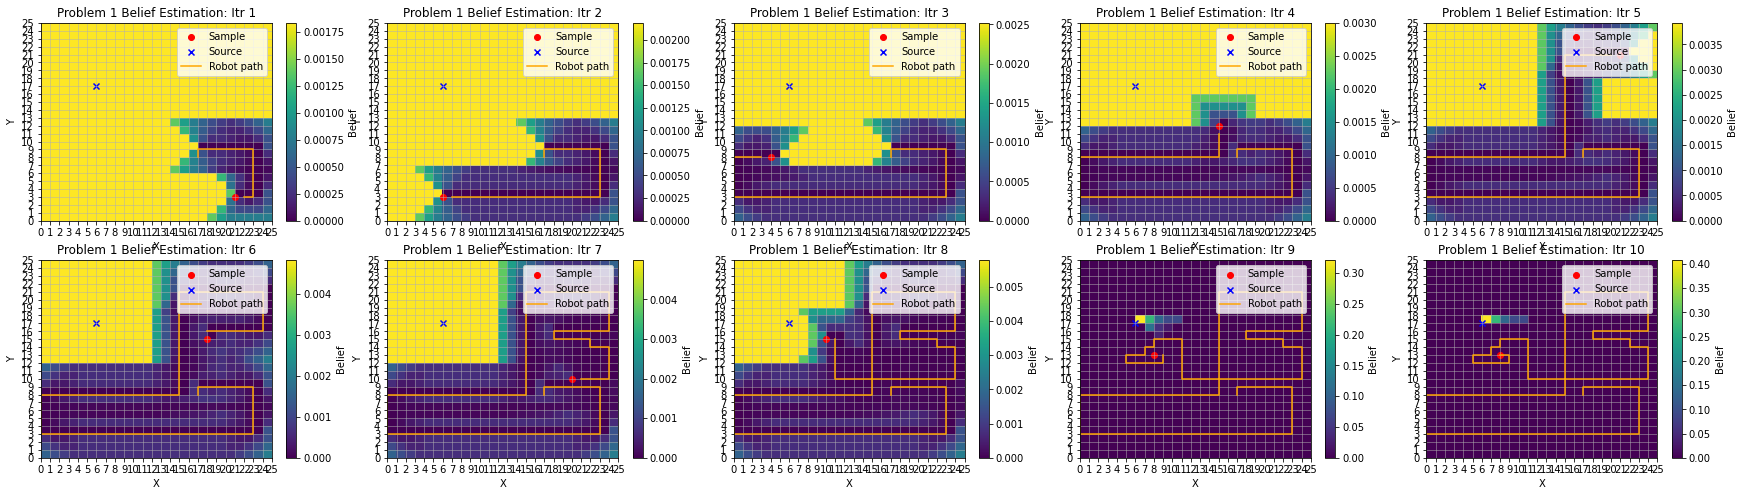

In [7]:
# Problem 2

initial_prior = 1/(X.shape[1] * X.shape[0])
B2 = np.ones_like(X) * initial_prior  # Initialize array for prior belief

plt.figure(figsize=(30, 8))  # Adjust figure size as needed

curr_sample2 = [17, 8]
x_vals2 = []
y_vals2 = []
# Iteratively generate and plot results for different samples
for i in range(10):  # Change the range according to the desired number of iterations
    for j in range(15):
        x_vals2.append(curr_sample2[0])
        y_vals2.append(curr_sample2[1])
        curr_sample2 = choose_direction(curr_sample2, B2)
        curr_result2 = generate_one_result(curr_sample2)
        prob_sum2 = compute_prob_sum(X, Y, curr_sample2, curr_result2, B2)
        B2 = update_belief(curr_sample2, curr_result2, B2, prob_sum2)
    plot_iteration(curr_sample2, B2, curr_result2, x_vals2, y_vals2, subplot_index=i+1)
plt.show()

In [ ]:
# Make a video

